In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings 
from datetime import datetime as dt
import matplotlib.dates as mdates
# это библиотека для управления warning'ами — то есть различными предупреждениями
                # ниже мы с помощью нее игнорим лишние предупреждения
                # мы можем это убрать, но где-то всплывали ворнинги, и чтобы они не раздражали и не вызывали вопросов, мы их отключим

warnings.filterwarnings('ignore')

Файл с выгрузкой данных о посещениях сайта и покупках с указанием даты и времени посещения и покупки, а также — с указанием канала, из которого пришел потенциальный клиент. 

In [2]:
data_cr = pd.read_csv('marketing_dataset.csv') # подключимся к данным

In [3]:
data_cr.head()

,Unnamed: 0,visit_date,conversion_date,channel
0,0,2015-01-01 15:16:08.239468,NaN,bloggers
1,1,2015-01-01 14:24:41.728927,NaN,bloggers
2,2,2015-01-01 12:03:01.710107,NaN,bloggers
3,3,2015-01-01 15:03:26.306819,NaN,bloggers
4,4,2015-01-01 13:00:58.124915,NaN,bloggers


In [4]:
data_cr.shape

(869731, 4)

In [5]:
data_cr.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
data_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869731 entries, 0 to 869730
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   visit_date       869731 non-null  object
 1   conversion_date  103514 non-null  object
 2   channel          869731 non-null  object
dtypes: object(3)
memory usage: 19.9+ MB


In [7]:
data_cr['visit_date'] = pd.to_datetime(data_cr['visit_date'])
data_cr['conversion_date'] = pd.to_datetime(data_cr['conversion_date'])

In [8]:
data_cr['cr_window'] = data_cr['conversion_date'] - data_cr['visit_date'] 

In [9]:
data_cr['cr_window'] = data_cr['cr_window'] / pd.to_timedelta(1, unit='D')


Посчитали окно конверсии для каждой операции:

In [10]:
data_cr

,visit_date,conversion_date,channel,cr_window
0,2015-01-01 15:16:08.239468,NaT,bloggers,NaN
1,2015-01-01 14:24:41.728927,NaT,bloggers,NaN
2,2015-01-01 12:03:01.710107,NaT,bloggers,NaN
3,2015-01-01 15:03:26.306819,NaT,bloggers,NaN
4,2015-01-01 13:00:58.124915,NaT,bloggers,NaN
...,...,...,...,...
869726,2019-11-30 12:35:22.752916,NaT,direct,NaN
869727,2019-11-30 11:48:22.611818,2019-12-05 23:24:51.463522,direct,5.483667
869728,2019-11-30 11:16:06.211602,NaT,direct,NaN
869729,2019-11-30 11:30:02.416155,NaT,direct,NaN


Делаю следующую структуру данных:
1. Дата
2. Канал
3. Всего кол-во визитов
4. Всего кол-во конверсий
5. Min Окно

Готовлю общие данные по всем сессиям:

In [11]:
data_cr['visit_date'] = data_cr['visit_date'].apply(lambda x: x.replace(microsecond = 0))
data_cr['conversion_date'] = data_cr['conversion_date'].apply(lambda x: x.replace(microsecond = 0))

In [12]:
data_cr

,visit_date,conversion_date,channel,cr_window
0,2015-01-01 15:16:08,NaT,bloggers,NaN
1,2015-01-01 14:24:41,NaT,bloggers,NaN
2,2015-01-01 12:03:01,NaT,bloggers,NaN
3,2015-01-01 15:03:26,NaT,bloggers,NaN
4,2015-01-01 13:00:58,NaT,bloggers,NaN
...,...,...,...,...
869726,2019-11-30 12:35:22,NaT,direct,NaN
869727,2019-11-30 11:48:22,2019-12-05 23:24:51,direct,5.483667
869728,2019-11-30 11:16:06,NaT,direct,NaN
869729,2019-11-30 11:30:02,NaT,direct,NaN


In [13]:
set(data_cr['channel'])

{'bloggers', 'direct', 'organics'}

In [14]:
bloggers = data_cr.loc[data_cr['channel']=='bloggers']
direct = data_cr.loc[data_cr['channel']=='direct']
organics = data_cr.loc[data_cr['channel']=='organics']

In [15]:
bl_visits = bloggers.resample('D', on = 'visit_date')['channel'].count().reset_index()
dr_visits = direct.resample('D', on = 'visit_date')['channel'].count().reset_index()
org_visits = organics.resample('D', on = 'visit_date')['channel'].count().reset_index()

In [16]:
bl_visits['format'] = 'bloggers'
dr_visits['format'] = 'direct'
org_visits['format'] = 'organics'

In [17]:
bl_visits

,visit_date,channel,format
0,2015-01-01,90,bloggers
1,2015-01-02,89,bloggers
2,2015-01-03,79,bloggers
3,2015-01-04,68,bloggers
4,2015-01-05,88,bloggers
...,...,...,...
2552,2021-12-27,207,bloggers
2553,2021-12-28,200,bloggers
2554,2021-12-29,223,bloggers
2555,2021-12-30,216,bloggers


Готовлю данные по сессиям, по которым состоялись конверсии: 

In [18]:
bloggers_ss = data_cr.loc[(data_cr.channel=='bloggers')&(data_cr.cr_window > 0)]
direct_ss = data_cr.loc[(data_cr.channel=='direct')&(data_cr.cr_window > 0)]
organics_ss = data_cr.loc[(data_cr.channel=='organics')&(data_cr.cr_window > 0)]

In [19]:
bloggers_ss

,visit_date,conversion_date,channel,cr_window
6,2015-01-01 14:39:07,2015-01-02 03:11:22,bloggers,0.522392
15,2015-01-01 11:36:06,2015-01-14 11:46:17,bloggers,13.007074
19,2015-01-01 11:55:31,2015-01-01 15:52:56,bloggers,0.164878
23,2015-01-01 14:01:31,2015-01-05 01:52:15,bloggers,3.493567
36,2015-01-01 16:06:46,2015-01-01 21:39:02,bloggers,0.230737
...,...,...,...,...
280738,2020-12-31 14:19:42,2021-01-02 10:36:48,bloggers,1.845213
280740,2020-12-31 13:57:45,2021-01-03 18:47:18,bloggers,3.201078
280745,2020-12-31 13:13:16,2020-12-31 13:52:56,bloggers,0.027546
280746,2020-12-31 13:58:24,2020-12-31 19:09:09,bloggers,0.215797


In [20]:
bloggers_ss_g = bloggers_ss.resample('D', on = 'visit_date')['channel'].count().reset_index()
direct_ss_g = direct_ss.resample('D', on = 'visit_date')['channel'].count().reset_index()
organics_ss_g = organics_ss.resample('D', on = 'visit_date')['channel'].count().reset_index()

In [21]:
bloggers_ss_g['format'] = 'bloggers'
direct_ss_g['format'] = 'direct'
organics_ss_g['format'] = 'organics'

In [22]:
bloggers_ss_g

,visit_date,channel,format
0,2015-01-01,13,bloggers
1,2015-01-02,23,bloggers
2,2015-01-03,18,bloggers
3,2015-01-04,12,bloggers
4,2015-01-05,16,bloggers
...,...,...,...
2187,2020-12-27,40,bloggers
2188,2020-12-28,48,bloggers
2189,2020-12-29,56,bloggers
2190,2020-12-30,36,bloggers


In [23]:
bloggers_ss_g.columns = ['date_of_conversion', 'quantity_of_conversion', 'format'] 
direct_ss_g.columns = ['date_of_conversion', 'quantity_of_conversion', 'format'] 
organics_ss_g.columns = ['date_of_conversion', 'quantity_of_conversion', 'format'] 

In [24]:
bloggers_ss_g

,date_of_conversion,quantity_of_conversion,format
0,2015-01-01,13,bloggers
1,2015-01-02,23,bloggers
2,2015-01-03,18,bloggers
3,2015-01-04,12,bloggers
4,2015-01-05,16,bloggers
...,...,...,...
2187,2020-12-27,40,bloggers
2188,2020-12-28,48,bloggers
2189,2020-12-29,56,bloggers
2190,2020-12-30,36,bloggers


In [25]:
bl_visits['format'] = 'bloggers'
dr_visits['format'] = 'direct'
org_visits['format'] = 'organics'

In [26]:
bloggers_data = pd.merge(bl_visits.reset_index(),bloggers_ss_g.reset_index(),
                         how = 'left')

In [27]:
bloggers_data.drop(columns = 'index', inplace=True)

In [28]:
direct_data = pd.merge(dr_visits.reset_index(),direct_ss_g.reset_index(),
                        how = 'left')

In [29]:
direct_data.drop(columns = 'index', inplace=True)

In [30]:
organics_data = pd.merge(org_visits.reset_index(),organics_ss_g.reset_index(),
                         how = 'left')

In [31]:
organics_data.drop(columns = 'index', inplace = True)

In [32]:
data = pd.concat([bloggers_data, direct_data, organics_data])

In [33]:
data

,visit_date,channel,format,date_of_conversion,quantity_of_conversion
0,2015-01-01,90,bloggers,2015-01-01,13.0
1,2015-01-02,89,bloggers,2015-01-02,23.0
2,2015-01-03,79,bloggers,2015-01-03,18.0
3,2015-01-04,68,bloggers,2015-01-04,12.0
4,2015-01-05,88,bloggers,2015-01-05,16.0
...,...,...,...,...,...
2552,2021-12-27,339,organics,NaT,NaN
2553,2021-12-28,337,organics,NaT,NaN
2554,2021-12-29,350,organics,NaT,NaN
2555,2021-12-30,333,organics,NaT,NaN


НАКОНЕЦ-ТО Отгрохали мощнючий датафрейм!!!

In [34]:
data.columns = ['visit_date', 'quantity_of_views', 'format', 'date_of_conversion', 'quantity_of_conversion'] 

In [35]:
data

,visit_date,quantity_of_views,format,date_of_conversion,quantity_of_conversion
0,2015-01-01,90,bloggers,2015-01-01,13.0
1,2015-01-02,89,bloggers,2015-01-02,23.0
2,2015-01-03,79,bloggers,2015-01-03,18.0
3,2015-01-04,68,bloggers,2015-01-04,12.0
4,2015-01-05,88,bloggers,2015-01-05,16.0
...,...,...,...,...,...
2552,2021-12-27,339,organics,NaT,NaN
2553,2021-12-28,337,organics,NaT,NaN
2554,2021-12-29,350,organics,NaT,NaN
2555,2021-12-30,333,organics,NaT,NaN


In [36]:
data['CR'] = data['quantity_of_conversion']/data['quantity_of_views']

In [37]:
data

,visit_date,quantity_of_views,format,date_of_conversion,quantity_of_conversion,CR
0,2015-01-01,90,bloggers,2015-01-01,13.0,0.144444
1,2015-01-02,89,bloggers,2015-01-02,23.0,0.258427
2,2015-01-03,79,bloggers,2015-01-03,18.0,0.227848
3,2015-01-04,68,bloggers,2015-01-04,12.0,0.176471
4,2015-01-05,88,bloggers,2015-01-05,16.0,0.181818
...,...,...,...,...,...,...
2552,2021-12-27,339,organics,NaT,NaN,NaN
2553,2021-12-28,337,organics,NaT,NaN,NaN
2554,2021-12-29,350,organics,NaT,NaN,NaN
2555,2021-12-30,333,organics,NaT,NaN,NaN


Для полного кайфа осталось добавить в наш датафрейм окно конверсии

In [38]:
bloggers_ss_w = bloggers_ss.resample('D', on = 'visit_date')['cr_window'].mean().reset_index()
direct_ss_w = direct_ss.resample('D', on = 'visit_date')['cr_window'].mean().reset_index()
organics_ss_w = organics_ss.resample('D', on = 'visit_date')['cr_window'].mean().reset_index()

In [39]:
bloggers_ss_w['format'] = 'bloggers'
direct_ss_w['format'] = 'direct'
organics_ss_w['format'] = 'organics'

In [40]:
bloggers_ss_w

,visit_date,cr_window,format
0,2015-01-01,14.408694,bloggers
1,2015-01-02,6.747126,bloggers
2,2015-01-03,3.741752,bloggers
3,2015-01-04,4.554853,bloggers
4,2015-01-05,25.851066,bloggers
...,...,...,...
2187,2020-12-27,10.652745,bloggers
2188,2020-12-28,9.375762,bloggers
2189,2020-12-29,6.542414,bloggers
2190,2020-12-30,20.990870,bloggers


In [41]:
bloggers_ss_w.columns = ['date_of_conversion', 'av_days_to_order', 'format'] 
direct_ss_w.columns = ['date_of_conversion', 'av_days_to_order', 'format'] 
organics_ss_w.columns = ['date_of_conversion', 'av_days_to_order', 'format'] 

In [42]:
data_s_oknom = pd.concat([bloggers_ss_w, direct_ss_w, organics_ss_w])

In [43]:
data_s_oknom

,date_of_conversion,av_days_to_order,format
0,2015-01-01,14.408694,bloggers
1,2015-01-02,6.747126,bloggers
2,2015-01-03,3.741752,bloggers
3,2015-01-04,4.554853,bloggers
4,2015-01-05,25.851066,bloggers
...,...,...,...
2187,2020-12-27,10.505255,organics
2188,2020-12-28,8.107420,organics
2189,2020-12-29,5.234542,organics
2190,2020-12-30,4.966997,organics


In [44]:
final_data = pd.merge(data, data_s_oknom,
                      how = 'left',
                     on = ['format', 'date_of_conversion'])

In [45]:
final_data.drop(columns='date_of_conversion', inplace = True)

Вот теперь точно готово!

In [46]:
final_data

,visit_date,quantity_of_views,format,quantity_of_conversion,CR,av_days_to_order
0,2015-01-01,90,bloggers,13.0,0.144444,14.408694
1,2015-01-02,89,bloggers,23.0,0.258427,6.747126
2,2015-01-03,79,bloggers,18.0,0.227848,3.741752
3,2015-01-04,68,bloggers,12.0,0.176471,4.554853
4,2015-01-05,88,bloggers,16.0,0.181818,25.851066
...,...,...,...,...,...,...
5139,2021-12-27,339,organics,NaN,NaN,NaN
5140,2021-12-28,337,organics,NaN,NaN,NaN
5141,2021-12-29,350,organics,NaN,NaN,NaN
5142,2021-12-30,333,organics,NaN,NaN,NaN


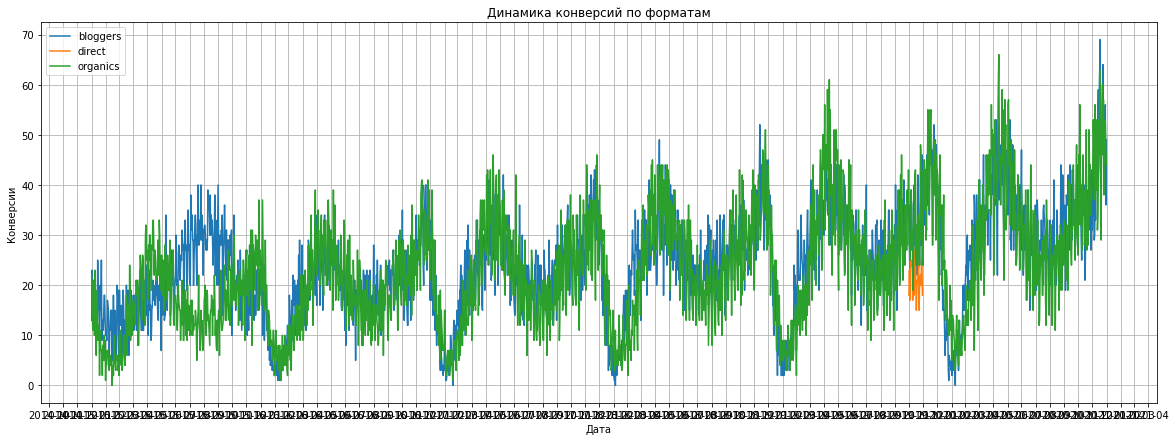

In [47]:

plt.figure(figsize = (20, 7))

plt.title('Динамика конверсий по форматам') 
plt.xlabel('Дата') 
plt.ylabel('Конверсии') 
plt.grid()
for f in pd.unique(final_data['format']):
    sns.lineplot( 
                 x = final_data.loc[final_data['format'] == f]['visit_date'], 
                 y = final_data.loc[final_data['format'] == f]['quantity_of_conversion'], 
                 label = f);
locator = mdates.MonthLocator()
X = plt.gca().xaxis
X.set_major_locator(locator)


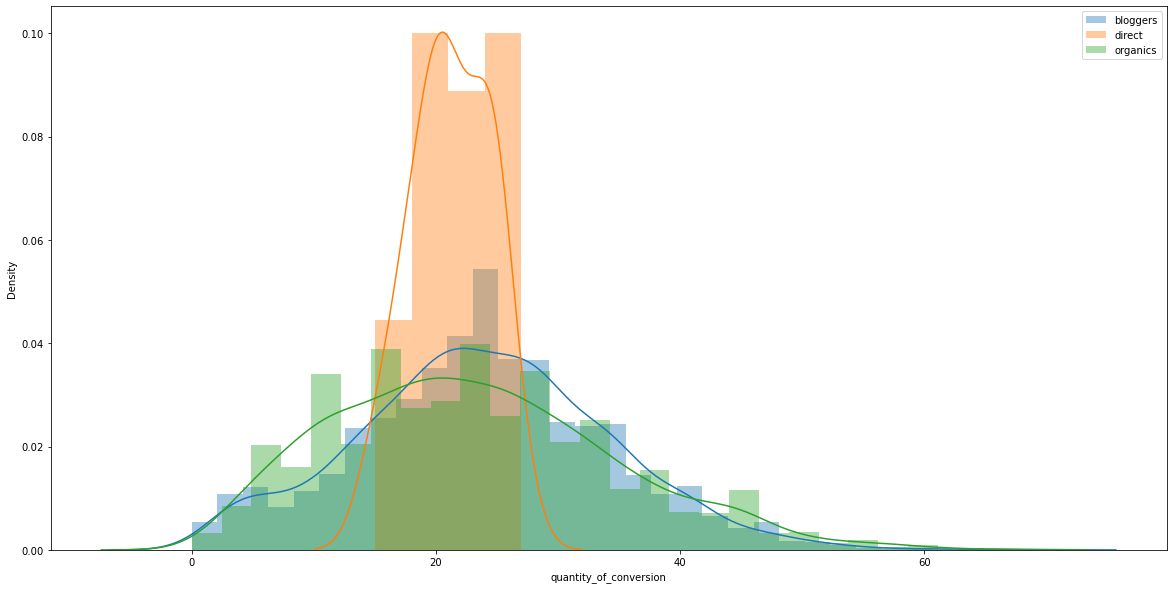

In [48]:
plt.figure(figsize=(20, 10)) 

filial = pd.unique(final_data['format']) # сделаем серию со списком филиалов

for f in filial: # фильтр по филиалу
    sns.distplot(final_data.loc[final_data['format'] == f]['quantity_of_conversion'], label = f);
    
plt.legend()

Распределение данных нормальное

По тексту задачи мы должны сделать прогноз для 2х групп, так как 3яя тестовая оказалась неуспешной + необходимо выбрать только данные с средним окном конверсии до 7 дней.

In [49]:
b_data = final_data.loc[(final_data['format'] == 'bloggers')&(final_data['av_days_to_order'] <= 7)]
or_data = final_data.loc[(final_data['format'] == 'organics')&(final_data['av_days_to_order'] <= 7)]
dr_data = final_data.loc[(final_data['format'] == 'direct')&(final_data['av_days_to_order'] <= 7)]

In [50]:
b_data.dropna(inplace=True)
or_data.dropna(inplace=True)
dr_data.dropna(inplace=True)

In [51]:
b_data

,visit_date,quantity_of_views,format,quantity_of_conversion,CR,av_days_to_order
1,2015-01-02,89,bloggers,23.0,0.258427,6.747126
2,2015-01-03,79,bloggers,18.0,0.227848,3.741752
3,2015-01-04,68,bloggers,12.0,0.176471,4.554853
7,2015-01-08,86,bloggers,18.0,0.209302,6.386057
8,2015-01-09,86,bloggers,19.0,0.220930,3.689314
...,...,...,...,...,...,...
2180,2020-12-20,184,bloggers,41.0,0.222826,3.933525
2181,2020-12-21,213,bloggers,50.0,0.234742,3.274241
2185,2020-12-25,212,bloggers,49.0,0.231132,4.381193
2189,2020-12-29,199,bloggers,56.0,0.281407,6.542414


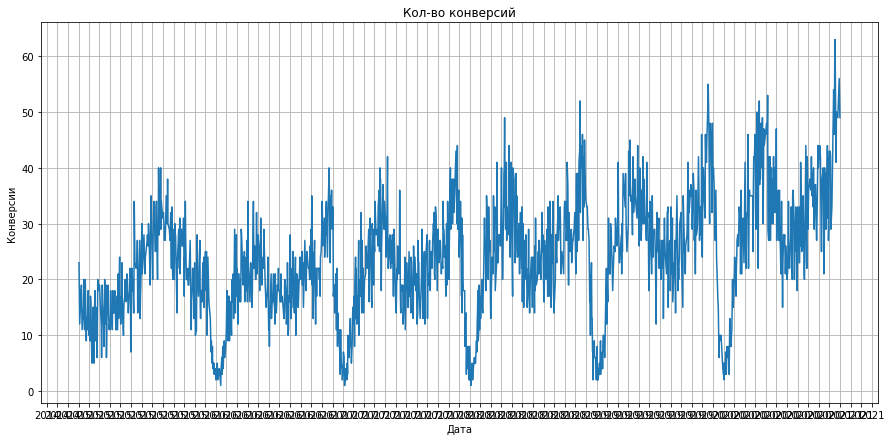

In [52]:
plt.figure(figsize = (15, 7))

plt.title('Кол-во конверсий') 
plt.xlabel('Дата') 
plt.ylabel('Конверсии') 
plt.grid()
locator = mdates.MonthLocator() # передадим, что хотим подписи помесячно
X = plt.gca().xaxis # инициируем ось х
X.set_major_locator(locator) # передадим в ось параметры локатора
sns.lineplot(x = b_data.groupby('visit_date')['quantity_of_conversion'].sum().index, # .index, чтобы взять дату по оси x
             y = b_data.groupby('visit_date')['quantity_of_conversion'].sum()
            )
plt.show()

In [53]:
train = b_data.loc[b_data['visit_date'] < '2020-01-01']
test = b_data.loc[b_data['visit_date'] >= '2020-01-01']

In [87]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 1826 to 2191
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   visit_date              245 non-null    datetime64[ns]
 1   quantity_of_views       245 non-null    int64         
 2   format                  245 non-null    object        
 3   quantity_of_conversion  245 non-null    float64       
 4   CR                      245 non-null    float64       
 5   av_days_to_order        245 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 13.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 1 to 1824
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   visit_date              1243 non-null   datetime64[ns]
 1   quantity_of_views       1243 non-null  

In [54]:
train_0 = train.groupby(['visit_date'])['quantity_of_conversion'].sum().reset_index() # сгруппировали данные обучающей выборки
test_0 = test.groupby(['visit_date'])['quantity_of_conversion'].sum().reset_index() # сгруппировали данные контрольной выборки

In [55]:
train_0.head()

,visit_date,quantity_of_conversion
0,2015-01-02,23.0
1,2015-01-03,18.0
2,2015-01-04,12.0
3,2015-01-08,18.0
4,2015-01-09,19.0


In [64]:
from prophet import Prophet

In [65]:
model = Prophet()
model

In [71]:
train_0.tail()

,ds,y
1238,2019-12-24,48.0
1239,2019-12-26,44.0
1240,2019-12-27,44.0
1241,2019-12-29,32.0
1242,2019-12-30,48.0


In [67]:
train_0.columns = ['ds', 'y'] # переименовали столбцы

test_0.columns = ['ds', 'y']

In [ ]:
model.fit(train_0) # подогнали модель под наши данные

In [ ]:
future = model.make_future_dataframe(periods=367) # говорим профету сделать дата-фрейм на 2021 год
future.tail(367) # выводим 367 строк до конца года

In [75]:
forecast = model.predict(future)
forecast.head() # возвращает много колонок

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,20.381020,19.906491,33.833899,20.381020,20.381020,6.583508,6.583508,6.583508,1.653011,1.653011,1.653011,4.930497,4.930497,4.930497,0.0,0.0,0.0,26.964528
1,2015-01-03,20.379477,15.238033,29.935486,20.379477,20.379477,1.788048,1.788048,1.788048,-2.213861,-2.213861,-2.213861,4.001909,4.001909,4.001909,0.0,0.0,0.0,22.167525
2,2015-01-04,20.377934,11.528481,25.832662,20.377934,20.377934,-1.400005,-1.400005,-1.400005,-4.440401,-4.440401,-4.440401,3.040396,3.040396,3.040396,0.0,0.0,0.0,18.977929
3,2015-01-08,20.371761,13.290128,27.245251,20.371761,20.371761,0.233908,0.233908,0.233908,1.236657,1.236657,1.236657,-1.002750,-1.002750,-1.002750,0.0,0.0,0.0,20.605668
4,2015-01-09,20.370217,13.249330,26.934515,20.370217,20.370217,-0.377205,-0.377205,-0.377205,1.653011,1.653011,1.653011,-2.030217,-2.030217,-2.030217,0.0,0.0,0.0,19.993012


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() # оставим только нужные

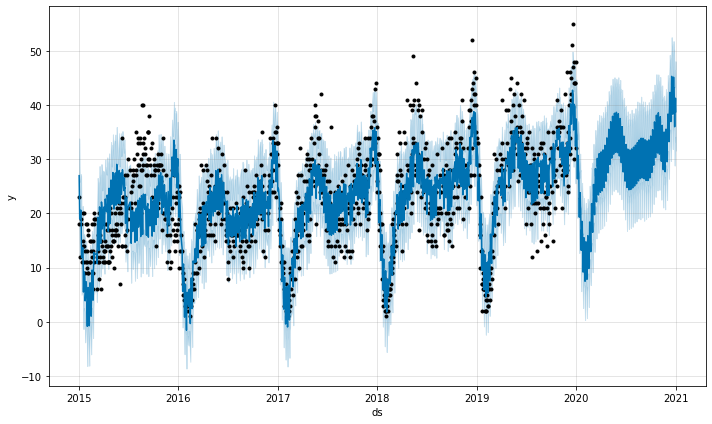

In [77]:
model.plot(forecast);

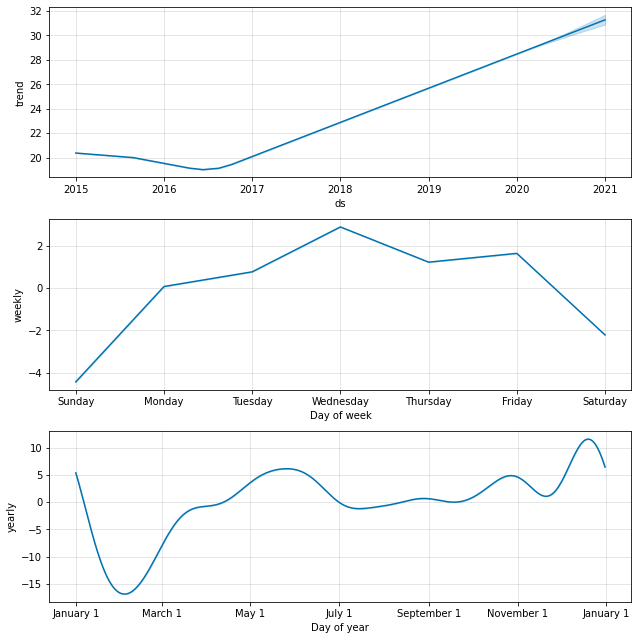

In [78]:
model.plot_components(forecast);

In [80]:
from sklearn.metrics import mean_absolute_error

In [86]:
mean_absolute_error(forecast['yhat'].tail(245), test_0['y'])

9.857779332007592

In [84]:
modul_dif = np.abs(forecast.tail(367).reset_index()['yhat'] - test_0['y']) # положим модули отклонений от прогноза в отдельную переменную

dif = np.mean(modul_dif/test_0['y']) # считаем среднее арифметическое отклонение 

dif_percent = dif*100 # получаем процент

dif_percent 

47.09558753667492